In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df=pd.read_csv(r"F:\layoffs.csv")

In [3]:
df.shape

(2361, 9)

In [4]:
df.head(10)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Atlassian,Sydney,Other,500.0,0.05,3/6/2023,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,3/6/2023,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,3/6/2023,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,3/6/2023,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,3/3/2023,Unknown,Brazil,788.0
5,Embark Trucks,SF Bay Area,Transportation,230.0,0.70,3/3/2023,Post-IPO,United States,317.0
6,Lendi,Sydney,Real Estate,100.0,NaN,3/3/2023,Unknown,Australia,59.0
7,UserTesting,SF Bay Area,Marketing,63.0,NaN,3/3/2023,Acquired,United States,152.0
8,Airbnb,SF Bay Area,NaN,30.0,NaN,3/3/2023,Post-IPO,United States,6400.0
9,Accolade,Seattle,Healthcare,NaN,NaN,3/3/2023,Post-IPO,United States,458.0


In [5]:
df.duplicated() #to check how many duplicates exist in the dataset

0       False
1       False
2       False
3       False
4       False
        ...  
2356    False
2357     True
2358     True
2359     True
2360     True
Length: 2361, dtype: bool

In [6]:
duplicate=df[df.duplicated()]
duplicate

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
1492,Cazoo,London,Transportation,750.0,0.15,6/7/2022,Post-IPO,United Kingdom,2000.0
2357,Yahoo,SF Bay Area,Consumer,1600.0,0.20,2/9/2023,Acquired,United States,6.0
2358,Hibob,Tel Aviv,HR,70.0,0.30,3/30/2020,Series A,Israel,45.0
2359,Casper,New York City,Retail,NaN,NaN,9/14/2021,Post-IPO,United States,339.0
2360,Wildlife Studios,Sao Paulo,Consumer,300.0,0.20,11/28/2022,Unknown,Brazil,260.0


In [7]:
df.drop_duplicates() #to delete the duplicates 

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
0,Atlassian,Sydney,Other,500.0,0.05,3/6/2023,Post-IPO,Australia,210.0
1,SiriusXM,New York City,Media,475.0,0.08,3/6/2023,Post-IPO,United States,525.0
2,Alerzo,Ibadan,Retail,400.0,NaN,3/6/2023,Series B,Nigeria,16.0
3,UpGrad,Mumbai,Education,120.0,NaN,3/6/2023,Unknown,India,631.0
4,Loft,Sao Paulo,Real Estate,340.0,0.15,3/3/2023,Unknown,Brazil,788.0
...,...,...,...,...,...,...,...,...,...
2352,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,3/13/2020,Unknown,United States,45.0
2353,Panda Squad,SF Bay Area,Consumer,6.0,0.75,3/13/2020,Seed,United States,1.0
2354,Tamara Mellon,Los Angeles,Retail,20.0,0.40,3/12/2020,Series C,United States,90.0
2355,EasyPost,Salt Lake City,Logistics,75.0,NaN,3/11/2020,Series A,United States,12.0


In [8]:
df['date'] = pd.to_datetime(df['date']) #changing the datatype

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2361 entries, 0 to 2360
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   company                2361 non-null   object        
 1   location               2361 non-null   object        
 2   industry               2357 non-null   object        
 3   total_laid_off         1621 non-null   float64       
 4   percentage_laid_off    1576 non-null   float64       
 5   date                   2360 non-null   datetime64[ns]
 6   stage                  2355 non-null   object        
 7   country                2361 non-null   object        
 8   funds_raised_millions  2152 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 166.1+ KB


In [10]:
df.isnull().sum()

company                    0
location                   0
industry                   4
total_laid_off           740
percentage_laid_off      785
date                       1
stage                      6
country                    0
funds_raised_millions    209
dtype: int64

In [11]:
df[df['industry'].isnull()]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
8,Airbnb,SF Bay Area,NaN,30.0,NaN,2023-03-03,Post-IPO,United States,6400.0
330,Bally's Interactive,Providence,NaN,NaN,0.15,2023-01-18,Post-IPO,United States,946.0
736,Juul,SF Bay Area,NaN,400.0,0.30,2022-11-10,Unknown,United States,1500.0
1595,Carvana,Phoenix,NaN,2500.0,0.12,2022-05-10,Post-IPO,United States,1600.0


In [12]:
df = df.drop(index=330)

In [13]:
industry_info=df['industry'].value_counts().reset_index()
industry_info

,industry,count
0,Finance,284
1,Retail,195
2,Healthcare,183
3,Transportation,148
4,Food,141
5,Marketing,139
6,Other,129
7,Consumer,118
8,Real Estate,117
9,Crypto,99


In [14]:
df[df['industry'].isnull()]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions
8,Airbnb,SF Bay Area,NaN,30.0,NaN,2023-03-03,Post-IPO,United States,6400.0
736,Juul,SF Bay Area,NaN,400.0,0.30,2022-11-10,Unknown,United States,1500.0
1595,Carvana,Phoenix,NaN,2500.0,0.12,2022-05-10,Post-IPO,United States,1600.0


In [15]:
df.loc[8,'industry']='Real Estate'
df.loc[736,'industry']='Consumer'
df.loc[1595,'industry']='Transportation'

In [16]:
df.index[(df['industry'] == 'CryptoCurrency')|(df['industry'] == 'Crypto Currency')].tolist()

[901, 1258, 1272]

In [17]:
df.loc[901,'industry']='Crypto'
df.loc[1272,'industry']='Crypto'
df.loc[1258,'industry']='Crypto'

In [18]:
industry_info=df['industry'].value_counts().reset_index()
industry_info

,industry,count
0,Finance,284
1,Retail,195
2,Healthcare,183
3,Transportation,149
4,Food,141
5,Marketing,139
6,Other,129
7,Consumer,119
8,Real Estate,118
9,Crypto,102


In [19]:
df.notnull().sum()

company                  2360
location                 2360
industry                 2360
total_laid_off           1621
percentage_laid_off      1575
date                     2359
stage                    2354
country                  2360
funds_raised_millions    2151
dtype: int64

In [ ]:
#Countries with Maximum Layoffs 

In [20]:
country=df['country'].value_counts().reset_index().head(10)
country

,country,count
0,United States,1540
1,India,148
2,Canada,99
3,Brazil,77
4,United Kingdom,74
5,Germany,68
6,Israel,56
7,Australia,54
8,Singapore,34
9,Indonesia,24


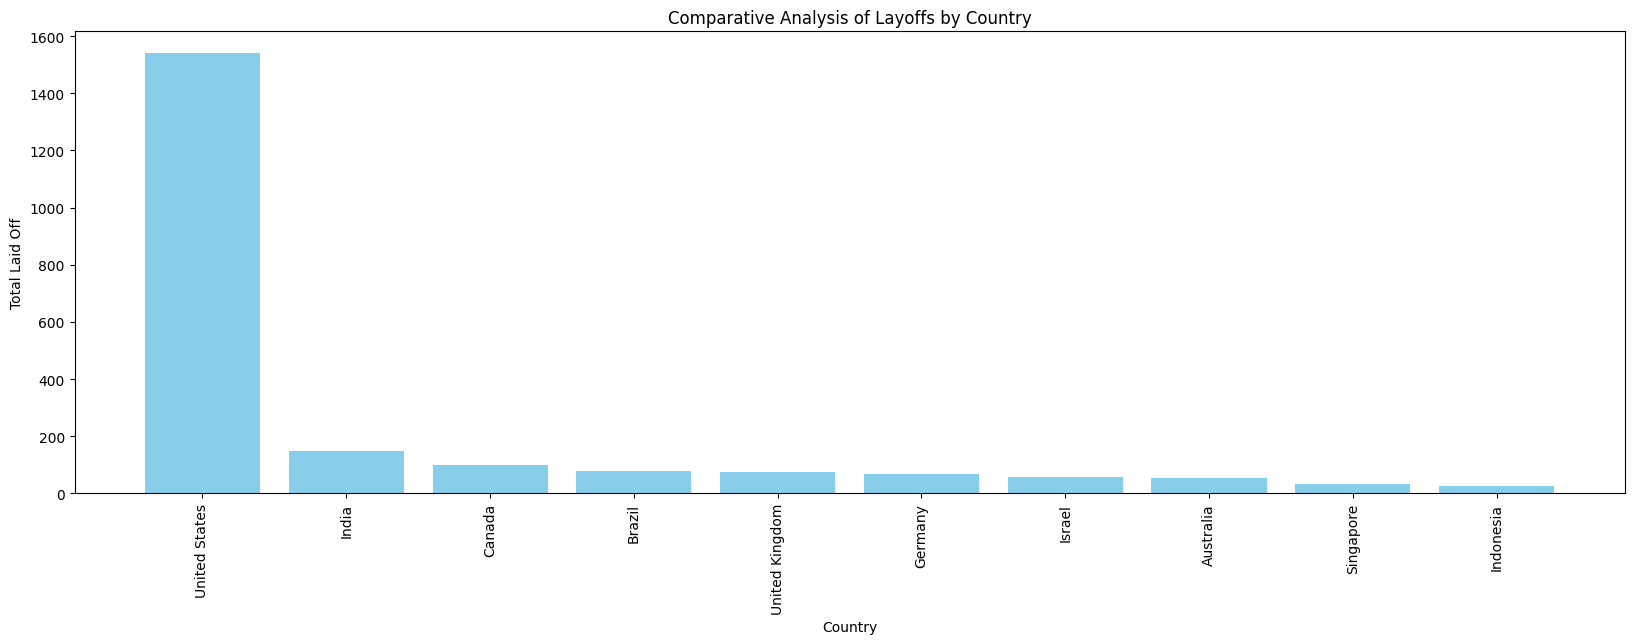

In [21]:
plt.figure(figsize=(20,6))
plt.bar(country['country'],country['count'],color='Skyblue')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Total Laid Off')
plt.title('Comparative Analysis of Layoffs by Country')
plt.show()

In [23]:
df['year']=df['date'].dt.year
year=df['year'].value_counts().sort_index()
labels=year.index.tolist()
size=year.values.tolist()

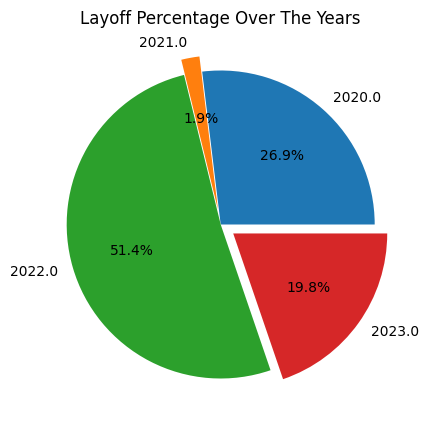

In [24]:
plt.figure(figsize=(16,5))
plt.pie(size,labels=labels,autopct='%1.1f%%',explode=[0,0.1,0,0.1])
plt.title('Layoff Percentage Over The Years')
plt.show()

In [ ]:
#Number of Employees Laid off across different industries

In [22]:
industry_info.sum()
industry_info.value_counts()

industry        count
Aerospace       6        1
Construction    16       1
Consumer        119      1
Crypto          102      1
Data            79       1
Education       93       1
Energy          12       1
Fin-Tech        3        1
Finance         284      1
Fitness         31       1
Food            141      1
HR              66       1
Hardware        17       1
Healthcare      183      1
Infrastructure  43       1
Legal           13       1
Logistics       42       1
Manufacturing   2        1
Marketing       139      1
Media           95       1
Other           129      1
Product         35       1
Real Estate     118      1
Recruiting      28       1
Retail          195      1
Sales           37       1
Security        74       1
Support         43       1
Transportation  149      1
Travel          66       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Layoff across Industries')

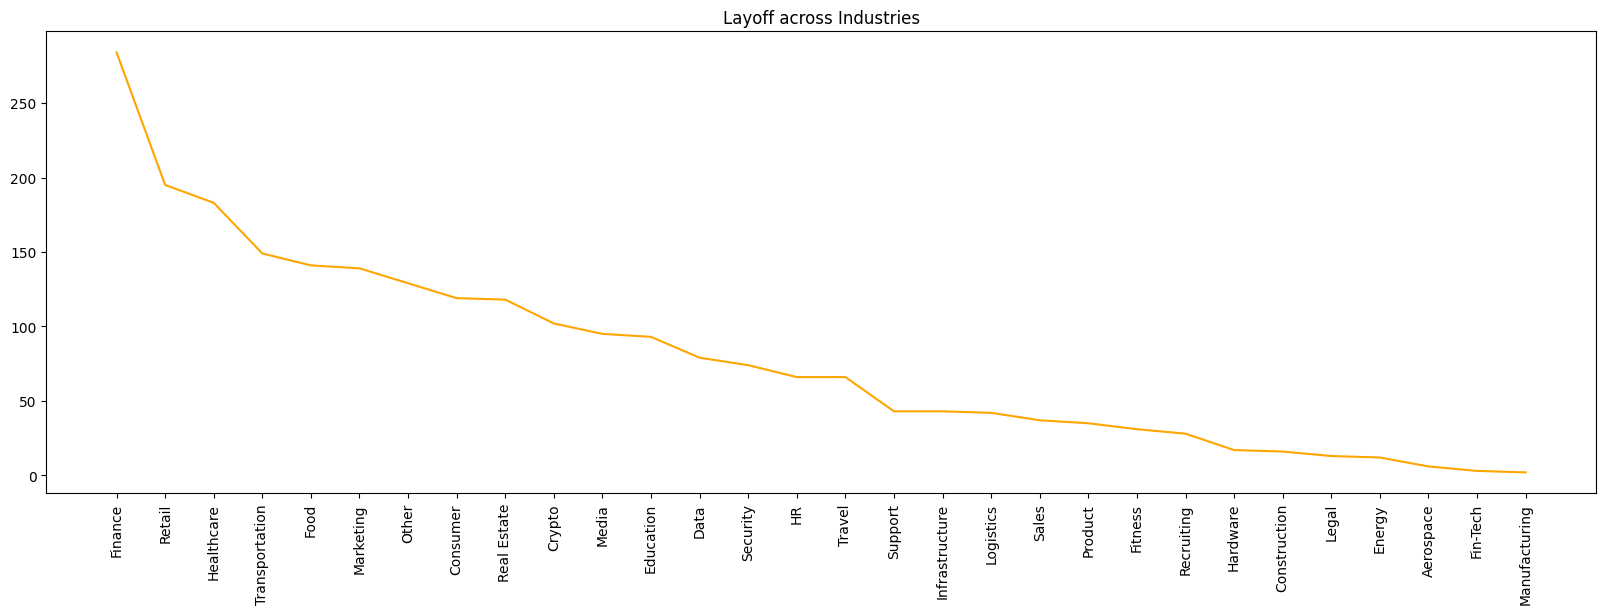

In [25]:
plt.figure(figsize=(20,6))
plt.plot(industry_info['industry'],industry_info['count'], color='orange')
plt.xticks(rotation=90)
plt.title('Layoff across Industries')

In [ ]:
#Top 10 Companies with Maximum Lay-offs

In [27]:
filter_df= df.groupby('industry')
top_3_year=filter_df.value_counts().reset_index().sort_values(by=['year','total_laid_off'],ascending=[True,False])
top_3_year.head(10)

,industry,company,location,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions,year,count
1051,Transportation,Uber,SF Bay Area,3700.0,0.14,2020-05-06,Post-IPO,United States,24700.0,2020.0,1
1050,Transportation,Uber,SF Bay Area,3000.0,0.13,2020-05-18,Post-IPO,United States,24700.0,2020.0,1
843,Retail,Groupon,Chicago,2800.0,0.44,2020-04-13,Post-IPO,United States,1400.0,2020.0,1
1061,Travel,Airbnb,SF Bay Area,1900.0,0.25,2020-05-05,Private Equity,United States,5400.0,2020.0,1
288,Finance,PaisaBazaar,Gurugram,1500.0,0.50,2020-06-16,Series G,India,496.0,2020.0,1
875,Retail,Stitch Fix,SF Bay Area,1400.0,0.18,2020-06-01,Post-IPO,United States,79.0,2020.0,1
1028,Transportation,Ola,Bengaluru,1400.0,0.35,2020-05-20,Series J,India,3800.0,2020.0,1
403,Food,Toast,Boston,1300.0,0.50,2020-04-07,Series F,United States,902.0,2020.0,1
400,Food,Swiggy,Bengaluru,1100.0,0.14,2020-05-18,Series I,India,1600.0,2020.0,1
37,Consumer,Magic Leap,Miami,1000.0,0.50,2020-04-22,Series E,United States,2600.0,2020.0,1


In [57]:
#df.set_index('company')
top_10_companies=df.groupby(['company'])['total_laid_off'].sum().reset_index()
top_10_companies_sorted=top_10_companies.sort_values(by='total_laid_off', ascending=False).head(10)
top_10_companies_sorted

,company,total_laid_off
64,Amazon,18150.0
682,Google,12000.0
1015,Meta,11000.0
1387,Salesforce,10090.0
1224,Philips,10000.0
1020,Microsoft,10000.0
541,Ericsson,8500.0
1688,Uber,7585.0
463,Dell,6650.0
207,Booking.com,4601.0


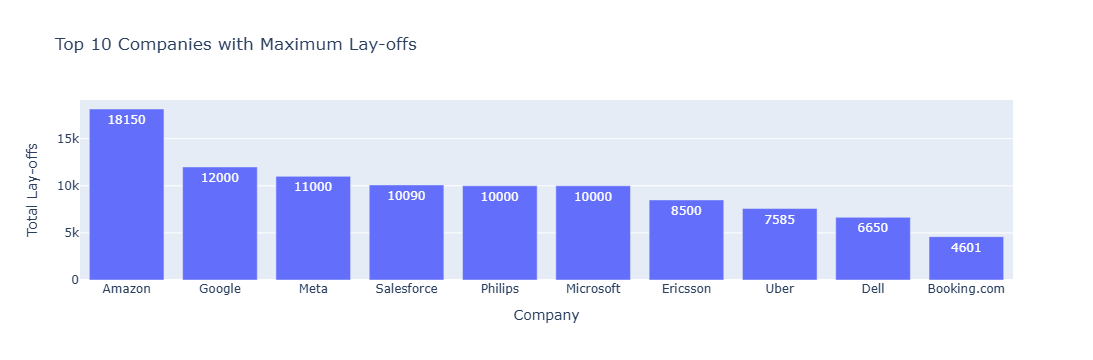

In [60]:
px.bar(top_10_companies_sorted,x='company',y='total_laid_off',text='total_laid_off',title='Top 10 Companies with Maximum Lay-offs',
      labels={'company':'Company','total_laid_off':'Total Lay-offs'})

In [ ]:
#Companies that laid off maximun employees each year

In [37]:
grouped_layoff=(df.groupby(['year','company'])['total_laid_off'].sum())
grouped_layoff=grouped_layoff.reset_index().sort_values(['year','total_laid_off'], ascending=[True,False])
grouped_layoff

,year,company,total_laid_off
540,2020.0,Uber,7525.0
56,2020.0,Booking.com,4375.0
218,2020.0,Groupon,2800.0
492,2020.0,Swiggy,2250.0
10,2020.0,Airbnb,1900.0
...,...,...,...
2138,2023.0,Wyre,0.0
2139,2023.0,XP,0.0
2142,2023.0,Yext,0.0
2143,2023.0,Zalando,0.0


In [30]:
top_3_per_year = grouped_layoff.groupby('year').head(3)
top_3_per_year

,year,company,total_laid_off
540,2020.0,Uber,7525.0
56,2020.0,Booking.com,4375.0
218,2020.0,Groupon,2800.0
603,2021.0,Bytedance,3600.0
617,2021.0,Katerra,2434.0
639,2021.0,Zillow,2000.0
1191,2022.0,Meta,11000.0
684,2022.0,Amazon,10150.0
836,2022.0,Cisco,4100.0
1866,2023.0,Google,12000.0


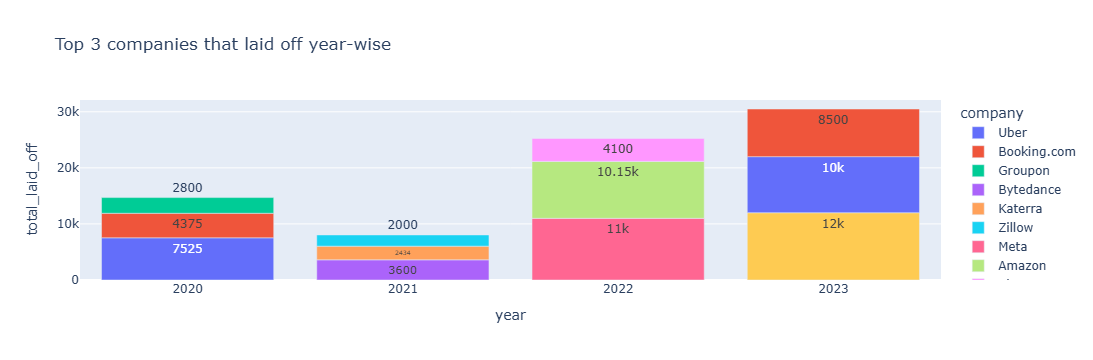

In [36]:
px.bar(top_3_per_year,x='year',y='total_laid_off',color='company', title='Top 3 companies that laid off year-wise',text_auto=True)

In [ ]:
#The stage of Companies VS Layoffs

In [77]:
company_stage=df.groupby(['stage','company'])['total_laid_off'].sum().reset_index()
company_stage

,stage,company,total_laid_off
0,Acquired,99,75.0
1,Acquired,Actifio,54.0
2,Acquired,Agoda,1500.0
3,Acquired,AliExpress Russia,400.0
4,Acquired,Ambev Tech,50.0
...,...,...,...
1970,Unknown,Zilch,0.0
1971,Unknown,Ziroom,0.0
1972,Unknown,Zume,200.0
1973,Unknown,eToro,100.0


Text(0, 0.5, 'Layoffs')

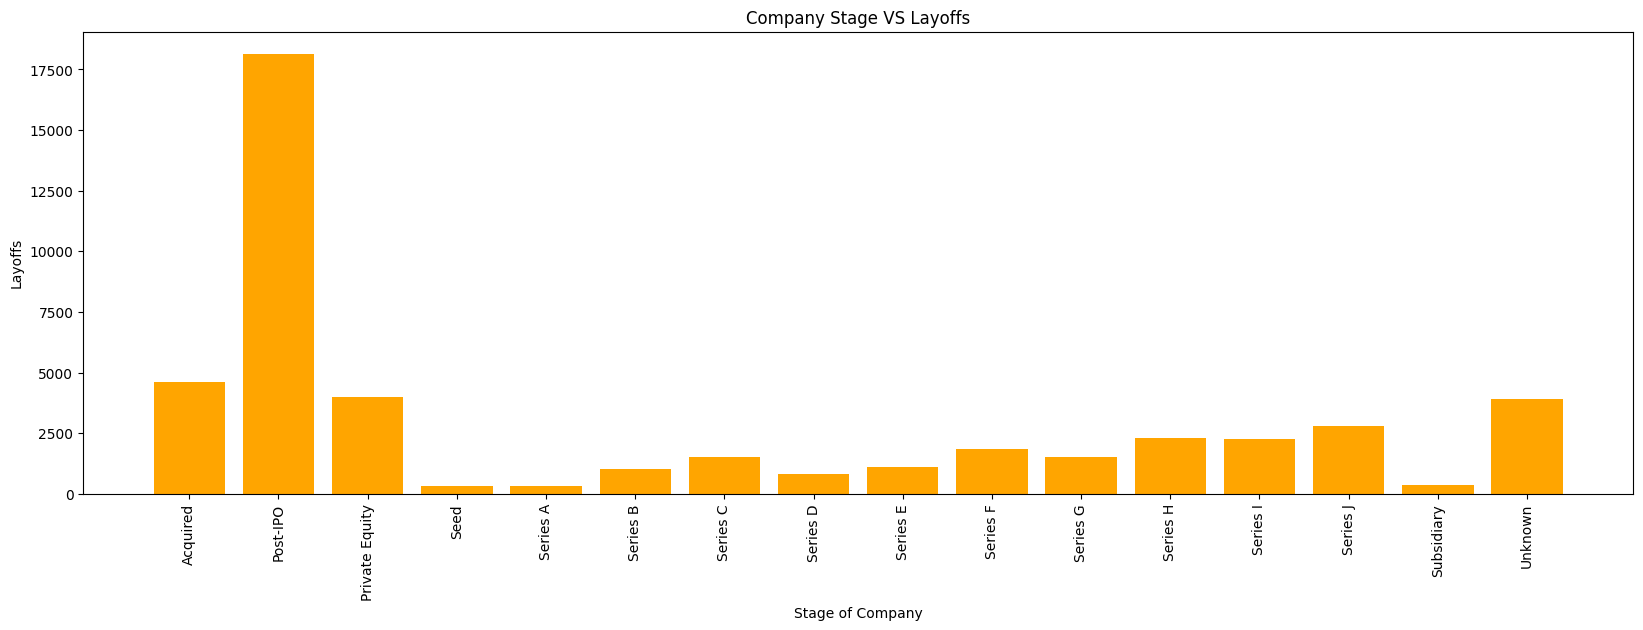

In [81]:
plt.figure(figsize=(20,6))
plt.bar(company_stage['stage'],company_stage['total_laid_off'], color='orange')
plt.xticks(rotation=90)
plt.title('Company Stage VS Layoffs')
plt.xlabel('Stage of Company')
plt.ylabel('Layoffs')

In [82]:
#the company that raised highest funds and laid off the most amount of people

In [118]:
total_funds_raised=df.groupby(['company','total_laid_off'])['funds_raised_millions'].sum().reset_index()
filtered_funds=total_funds_raised.sort_values(by='total_laid_off', ascending=False)
filtered_funds
#filtered_funds.sort_values(by='funds_raised_millions', ascending=False).head(10)

,company,total_laid_off,funds_raised_millions
551,Google,12000.0,26.0
852,Meta,11000.0,26000.0
50,Amazon,10000.0,108.0
856,Microsoft,10000.0,1.0
439,Ericsson,8500.0,663.0
...,...,...,...
101,Aya,5.0,3.0
482,Flytedesk,4.0,4.0
1407,TutorMundi,4.0,2.0
1256,Spyce,4.0,26.0


In [105]:
specific_company=['tesla','meta']
df[df['company'].isin(specific_company)]

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised_millions,year
